In [1199]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, r2_score
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

In [1200]:
#Loading Dataset & General Characteristics
df = pd.read_csv("Australian Data.csv")

#Shows the columns present in the source
print(df.columns)

#Number of rows and columns
print("\nNumber of rows: "+str(df.shape[0])+"\nNumber of columns: "+str(df.shape[1]))

#Showing Missing Values for each column
print("\n"+str(df.isnull().sum()))

Index(['id', 'date', 'confirmed', 'deaths', 'recovered', 'tests', 'vaccines',
       'people_vaccinated', 'people_fully_vaccinated', 'hosp', 'icu', 'vent',
       'school_closing', 'workplace_closing', 'cancel_events',
       'gatherings_restrictions', 'transport_closing',
       'stay_home_restrictions', 'internal_movement_restrictions',
       'international_movement_restrictions', 'information_campaigns',
       'testing_policy', 'contact_tracing', 'facial_coverings',
       'vaccination_policy', 'elderly_people_protection',
       'government_response_index', 'stringency_index',
       'containment_health_index', 'economic_support_index',
       'administrative_area_level', 'administrative_area_level_1',
       'administrative_area_level_2', 'administrative_area_level_3',
       'latitude', 'longitude', 'population', 'iso_alpha_3', 'iso_alpha_2',
       'iso_numeric', 'iso_currency', 'key_local', 'key_google_mobility',
       'key_apple_mobility', 'key_jhu_csse', 'key_nuts', 'key_g

In [1201]:
#Preprocessing - includes cleaning & appropriately handling NaN values
df.fillna(0,inplace=True)
df.fillna(method='ffill', inplace=True)

#Some columns have cumulative entries (sum of the previous value) therefore they have been modified not to sum previous values
df['deaths'] = df['deaths'].diff().fillna(df['deaths'])
df['hosp'] = df['hosp'].diff().fillna(df['hosp'])
df['confirmed'] = df['confirmed'].diff().fillna(df['confirmed'])
df['tests'] = df['tests'].diff().fillna(df['tests'])
df['recovered'] = df['recovered'].diff().fillna(df['recovered'])
df['vaccines'] = df['vaccines'].diff().fillna(df['vaccines'])
df['people_vaccinated'] = df['people_vaccinated'].diff().fillna(df['people_vaccinated'])
df['people_fully_vaccinated'] = df['people_fully_vaccinated'].diff().fillna(df['people_fully_vaccinated'])
df = df[df['deaths'] >= 0]

In [1202]:
#Features(Columns) from the dataset that will be used for creating the decision tree model. Three sets (1) Extensive (2) Limited (3) Correlation Matrix
features = ['confirmed','people_vaccinated','population','people_fully_vaccinated','icu','vent','school_closing', 'workplace_closing', 'cancel_events',
       'gatherings_restrictions', 'transport_closing',
       'stay_home_restrictions', 'internal_movement_restrictions',
       'international_movement_restrictions', 'information_campaigns',
       'testing_policy', 'contact_tracing', 'facial_coverings',
       'vaccination_policy', 'elderly_people_protection','administrative_area_level']

limited_features = ['gatherings_restrictions','transport_closing', 'stay_home_restrictions']

features_for_matrix = ['gatherings_restrictions','facial_coverings','contact_tracing','workplace_closing','cancel_events']

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, 'gatherings_restrictions'),
  Text(1.5, 0, 'facial_coverings'),
  Text(2.5, 0, 'contact_tracing'),
  Text(3.5, 0, 'workplace_closing'),
  Text(4.5, 0, 'cancel_events')])

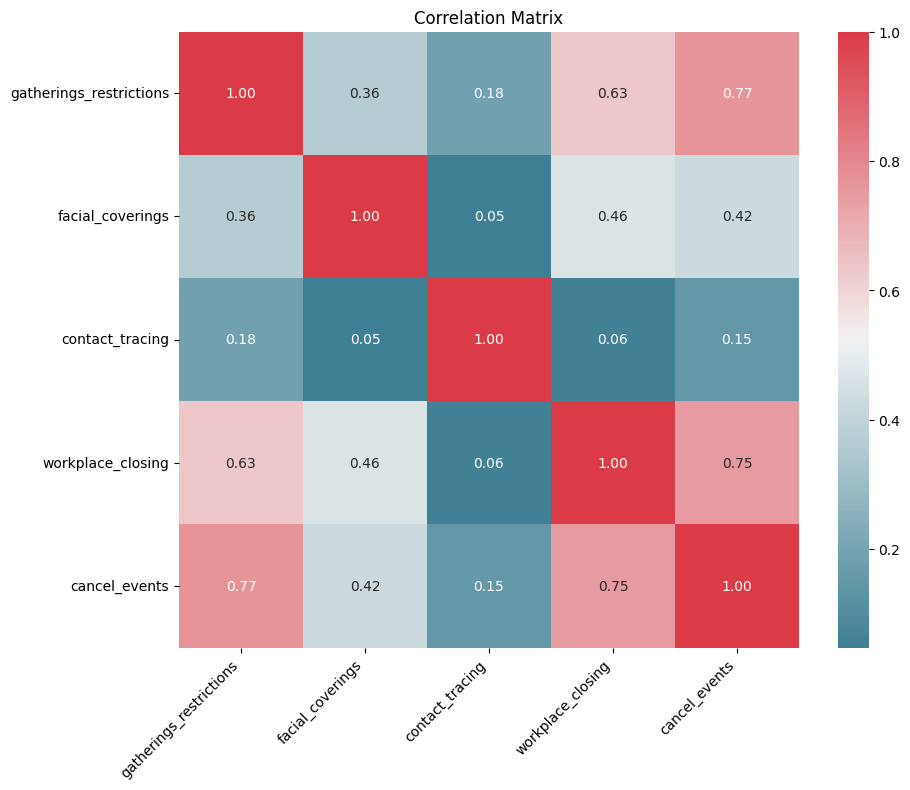

In [1203]:
#This section prints a correlation matrix
correlation_matrix = df[features_for_matrix].corr()

# Create a figure and axes
fig, ax = plt.subplots(figsize=(10, 8))
col_map = sns.diverging_palette(210, 10)

# Draw the correlation matrix heatmap
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap=cmap)

# Adding Title and setting axis
ax.set_title('Correlation Matrix')
plt.xticks(rotation=45, ha='right')

In [1204]:
#Splitting the data for use in creating the model
y = df['deaths']
X = df[features]
df = df.dropna()

In [1205]:
# Building the Decision Tree Classifier to predict the number of deaths on any given day based on Government Restrictions
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2, random_state=1)
dt_classifier = DecisionTreeClassifier()
dt_classifier = dt_classifier.fit(X_training,y_training)
y_prediction = dt_classifier.predict(X_testing)

In [1206]:
# Accuracy of the model
print("Accuracy:",accuracy_score(y_testing, y_prediction))

#Classification Report
report = classification_report(y_testing, y_prediction, zero_division=0)
print(report)

#R^2 Value
r2 = r2_score(y_testing, y_prediction)
print("R-squared value:", r2)

Accuracy: 0.7370423204945317
              precision    recall  f1-score   support

         0.0       0.95      0.95      0.95      1575
         1.0       0.22      0.22      0.22        89
         2.0       0.16      0.16      0.16        51
         3.0       0.14      0.18      0.15        28
         4.0       0.16      0.13      0.14        39
         5.0       0.14      0.15      0.15        26
         6.0       0.09      0.12      0.10        24
         7.0       0.10      0.12      0.11        16
         8.0       0.10      0.14      0.11        14
         9.0       0.00      0.00      0.00        21
        10.0       0.00      0.00      0.00        16
        11.0       0.12      0.11      0.11        18
        12.0       0.00      0.00      0.00        12
        13.0       0.12      0.09      0.11        11
        14.0       0.00      0.00      0.00        15
        15.0       0.08      0.08      0.08        12
        16.0       0.29      0.18      0.22        1

Text(0.5, 1.0, 'Confusion Matrix')

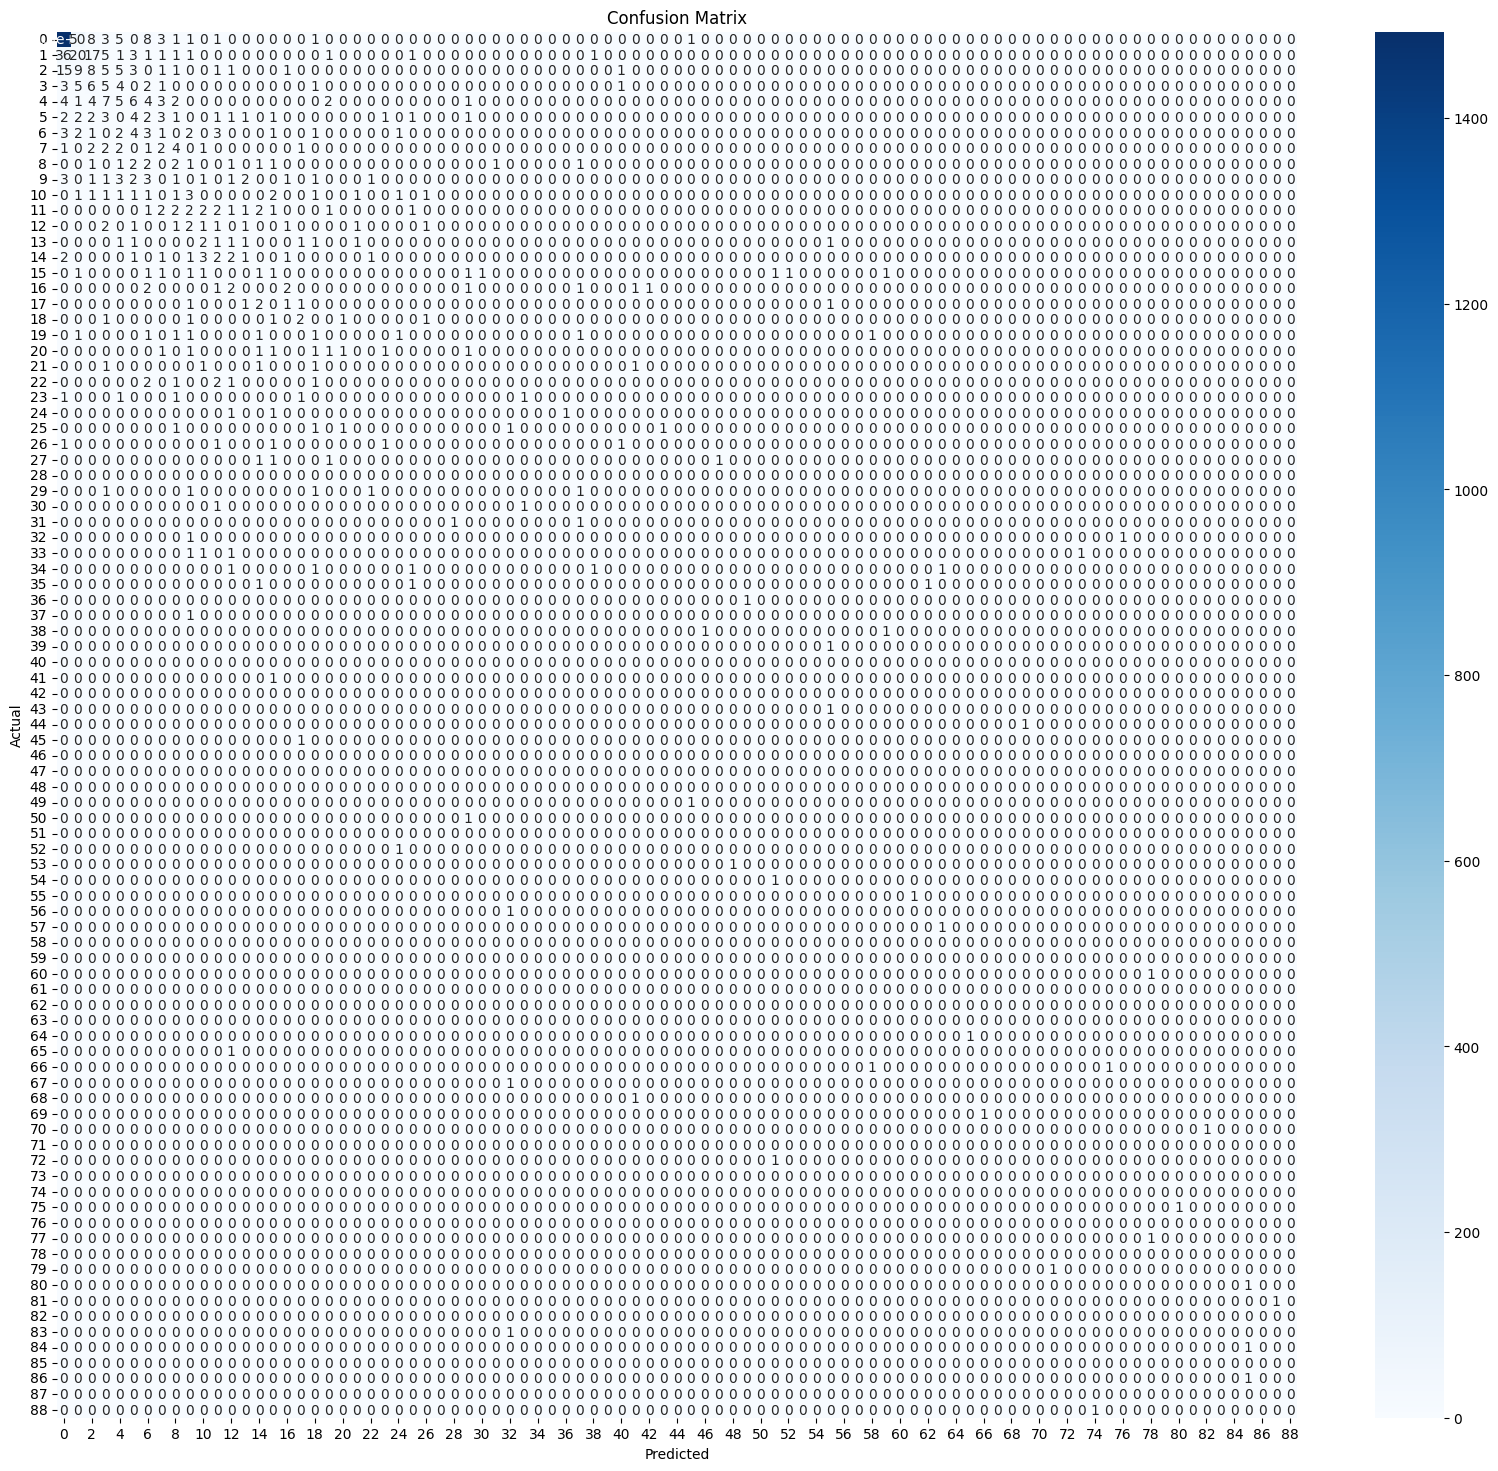

In [1207]:
#Confusion Matrix
confusion_matrix = confusion_matrix(y_testing, y_prediction)
plt.figure(figsize=(20, 18))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix")

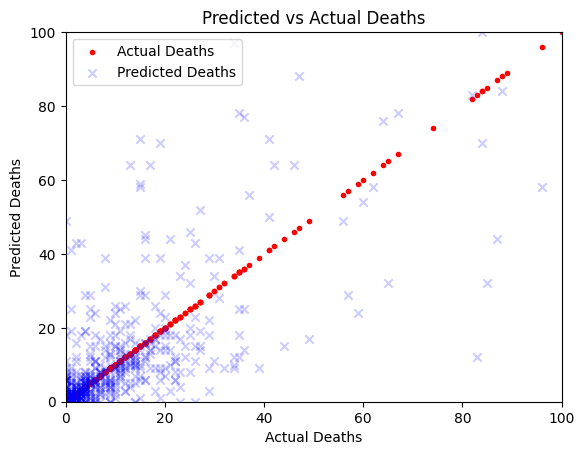

In [1208]:
#Predicted Deaths vs Actual
plt.scatter(y_testing, y_testing, color='r', marker='.', label='Actual Deaths')
plt.scatter(y_testing, y_prediction, color='b', marker='x', label='Predicted Deaths', alpha = 0.2)
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.xlabel('Actual Deaths')
plt.ylabel('Predicted Deaths')
plt.title('Predicted vs Actual Deaths')
plt.legend()